# 5SSG2060_Week4_Point Pattern Analysis (PPA)  I
<a href="#This Week's Overview">This Week's Overview</a>

<a href="#Learning Outcomes">Learning Outcomes</a>

<a href="#Get prepared">Get prepared</a>

<a href="#What is Point Pattern Analysis (PPA)">What is Point Pattern Analysis (PPA)</a>

<a href="#Data processing">Data processing</a>
- <a href="#Generate random point data">Generate random point data</a>
- <a href="#Generating CSR">Generating CSR</a>
- <a href="#Convex hull">Convex hull</a>

<a href="#Centrography analysis">Centrography analysis</a>
- <a href="#Mean center $(x_{mc},y_{mc})$">Mean center $(x_{mc},y_{mc})$</a> 
- <a href="#Weighted mean center $(x_{wmc},y_{wmc})$">Weighted mean center $(x_{wmc},y_{wmc})$</a> 
- <a href="#Manhattan Median $(x_{mm},y_{mm})$">Manhattan Median $(x_{mm},y_{mm})$</a>
- <a href="#Euclidean Median $(x_{em},y_{em})$">Euclidean Median $(x_{em},y_{em})$</a> 

<a href="#Dispersion and Orientation">Dispersion and Orientation</a>
- <a href="#Standard Distance & Standard Distance Circle">Standard Distance & Standard Distance Circle</a>
- <a href="#Standard Deviational Ellipse">Standard Deviational Ellipse</a>
- <a href="#Shape Analysis">Shape Analysis</a>

<a href="#Nearest Neighbors and Statistics">Nearest Neighbors and Statistics</a>
- <a href="#Nearest Neighbors">Nearest Neighbors</a>
- <a href="#Mean Nearest Neighbor Distance Statistics">Mean Nearest Neighbor Distance Statistics</a>
- <a href="#Nearest Neighbor Distance Functions">Nearest Neighbor Distance Functions</a>
- <a href="#Interevent Distance Functions">Interevent Distance Functions</a>

<a href="#K Nearest Neighbors (KNN)">K Nearest Neighbors (KNN)</a>
- <a href="#Weights">Weights</a>
  - <a href="#k-nearest neighbor weights">k-nearest neighbor weights</a>
  - <a href="#Distance band weights">Distance band weights</a>
  - <a href="#Kernel weights">Kernel weights</a>

- <a href="#Task 1">Task 1</a>
- <a href="#Task 2">Task 2</a>
- <a href="#Task 3">Task 3</a>
- <a href="#Task 4">Task 4</a>
- <a href="#Task 5">Task 5</a>
- <a href="#Task 6">Task 6</a>
- <a href="#Task 7">Task 7</a>
- <a href="#Task 8">Task 8</a>
- <a href="#Task 9">Task 9</a>
- <a href="#Task 10">Task 10</a>

## <a id="This Week's Overview">This Week's Overview</a>

In the following two weeks, we will develop our capability in using `pointpats` from `PySAL` to realize spatial point pattern analysis, visualization and exploration. Tasks for this week will mainly focus on visualizing spatial point patterns and exploring *distance-based* spatial point patterns analysis; while on Week 5 we will spend most of the time exploring *density-based* spatial point patterns analysis methods.

In this practical, besides of the first section on CSR process using simulated points, all rest tasks will rely on London pubs data to develop your understanding on:

- Point processing.
- Centrography and visualization.
- 
- Distance based methods.


## <a id="Learning Outcomes">Learning Outcomes</a>

By the end of this practical you should be able to:
- explore how random numbers and random points can be generated
- appreciate the nature of uniform random points and how they are distributed 
- measure the centrality and the spatial dispersion of random points
- familiarise ourselves with distance based point pattern analysis methods

## <a id="Get prepared">Get prepared</a>
We will import the general libraries at the beginning of this practical, and leave specific ones for corresponding sections for clarification.

In [1]:
import os
import numpy as np
import urllib
import zipfile
import re

import libpysal as lps
from shapely import geometry as sgeom
from shapely.geometry import Point
import descartes as des
import pysal as ps
import pointpats 
from pointpats import PointPattern
from pysal.contrib import shapely_ext
from pointpats import PoissonPointProcess as ppp_csr
from pointpats import as_window
from pysal.contrib.viz import mapping as maps # For maps.plot_choropleth
import matplotlib.pyplot as plt
import matplotlib.collections as mplc
%matplotlib inline

import pandas as pd
import geopandas as gpd
import seaborn as sns


import warnings
warnings.simplefilter('ignore')

## <a id="What is Point Pattern Analysis (PPA)">What is Point Pattern Analysis (PPA)</a>

What are points in space? Should we simply take them as locations of interest? We could normally categorize points into 2 groups as **Event Points** and **Arbitrary Points**. 
- *Event Points* are locations where something of interest has occurred, hence could represent [a wide variety of phenomena](https://en.wikipedia.org/wiki/Point_process). 
- *Arbitrary Points* are locations where the phenomena of interest has not been observed, such as the so-called "empty space" or "regular" points. 

As our practicals mostly looking at real life data in our society, so you will be given **Event Points** to observe their collective spatial pattern characteristics. Let's recall the concept of `complete spatial randomness (CSR)` introduced in lecture: if there are a series of *point locations*, $(p_1, p_2, \ldots, p_n)$ in a two-dimensional study region $\Re$, then for point location $i$, its spatial identity should be $p_i = (x_i, y_i)$. 

If it is a `CSR` process, then the points are independent from one another (generated from stochastic process, and with constant probability); 

If the point patterns are not under `CSR` (which is the normal case), they could be affected by **First order effects** and **Second order effects** covered in lecture. 
- *First order effects*: Non-CSR point process' intensity pattern driven by underlying covariate.
- *Second order effects*: Non-CSR point process due to interaction and dependence between events in space. 

So to further investigate the process' spatial structure, detect the points' deviations from `CSR` and test the point pattern statistics, we will use the main mathods from point pattern analysis module `pointpats` in `PySAL` as below:
1. Point Processing
2. Centrography and Visualization
3. Nearest Neighbors
4. Other Distance Based Methods

## <a id="Data processing">Data processing</a>

Set up a **"data"** folder in your directory for this notebook, and copy the data we've used for last week (LDN-LSOAs shapefile) into your data folder. 

### <a id="Generate random point data">Generate random point data</a>
In order to simulate the `CSR` process, let's start with generating some random series of data by calling `random` in `numpy`. It will get you 100 random data between 0 and 1, with 6 decimals. Upon the execution of the code, you will find a .txt file named as "random_points" generated in your local directory.

In [2]:
# test randomness
import random
for i in range(100):
    print ('%.6f' % random.random(), '%.6f' % random.random())    
file = open('random_points.txt', 'w')

for i in range(100):
    file.write('%.6f' % random.random())
    file.write('%.6f' % random.random())
    file.write("\n")
file.close()

0.785388 0.299242
0.547531 0.207561
0.585725 0.617278
0.454654 0.438138
0.281051 0.239407
0.655514 0.380376
0.954063 0.491426
0.368366 0.484183
0.093711 0.671034
0.048722 0.291628
0.186937 0.915901
0.347809 0.351968
0.858222 0.480740
0.722559 0.837309
0.005466 0.966516
0.983433 0.313901
0.136742 0.690891
0.169448 0.298638
0.737330 0.932291
0.196093 0.293578
0.638373 0.487815
0.115317 0.765128
0.981536 0.891248
0.145032 0.617837
0.527201 0.170828
0.044821 0.356957
0.790743 0.413507
0.401915 0.220021
0.328308 0.228235
0.342151 0.540320
0.068558 0.302551
0.887273 0.247973
0.548609 0.988680
0.340088 0.828833
0.484031 0.276065
0.350762 0.887366
0.235737 0.331286
0.707578 0.504510
0.234515 0.199437
0.214982 0.976107
0.726893 0.966671
0.803770 0.521935
0.382509 0.444603
0.794858 0.757680
0.929767 0.907533
0.765298 0.590298
0.241108 0.329688
0.366365 0.849276
0.359462 0.256788
0.717490 0.010144
0.375647 0.641756
0.847418 0.092445
0.302198 0.140043
0.054097 0.048683
0.059257 0.116263
0.788710 0

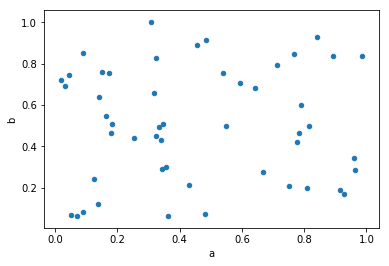

In [3]:
# use the random data to generate random points 
df = pd.DataFrame(np.random.rand(50, 2), columns=['a', 'b'])

# plot out the random points
df.plot(kind='scatter', x='a', y='b')
plt.show()

###  <a id="Task 1">Task 1</a>  

1. Let us think of the mean centre of the random points. Can you calculate the spatial mean? If the points are uniformly randomly distributed, between (0,0) and (1,1), where would the spatial mean most likely be found? Why?

2. Repeat producing another set of random points, calculate the spatial mean, and see how they change their position from one set to another. Is there a way to make the spatial mean more stable?

3. Just as we do in ordinary statistics, we measure the scatteredness of observations on a single variable about their mean by the standard deviation. In other words, we can measure the degree of spatial dispersion of a point pattern by its standard distance using square root of the average square of the distances from every point to the spatial mean. Try calculating this and produce the circle of influence around the spatial mean.

** If you feel any stuck in this task, don't be "panic" at all, just keep continuing your practical and you will get the hints/answers on your halfway.

### <a id="Generating CSR">Generating CSR</a>

Now let's move one step back into our London reality, to try to simulate a 1000-point dataset within London boundary from a `CSR (complete spatial randomness)` process. From your lecture, you may realize that `CSR` events follow a homogeneous Poisson Process over the study region $\Re$. Hence, point pattern is considered to be number of events occurring in sub-regions A, of the whole study region $\Re$.

<img src="Picture1.png" style="width: 100px;"/>

where Y(A) is the number of events occurring in the area A, following a Poisson distribution with mean λA.
<img src="Picture2.png" style="width: 200px;"/>

So given N events in A, they are (1) independent random sample from a uniform distribution with equal probability of occurring at any position, indicating no first order effects; (2) independent of the position of any other, implying no spatial interaction with one another.

In the following section, we will call `PoissonPointProcess` in `pointpats` to generate the dataset. It is similar with the previous practice on getting random point data: we generate events with x coordinates from a uniform distribution on $(x_1,x_2,...,x_i)$ and y coordinates from a uniform distribution on $(y_1,y_2,...,y_i)$. So a real-world observed pattern of points can be compared with the simulated ones based on CSR, in order to assess whether observed patterns are regular, clustered or random distribution.

For more references, you may find the `pointpats` documents at <https://pointpats.readthedocs.io/en/latest/index.html>

In [4]:
# open London lsoa polygon shapefile
lsoas = ps.open ('data/LDN-LSOAs.shp') 
# define the polygon shapes from London lsoa data
polys = [shp for shp in lsoas] 
# Create the exterior polygons for Greater London from the union of the polygon shapes
boundary = shapely_ext.cascaded_union(polys)

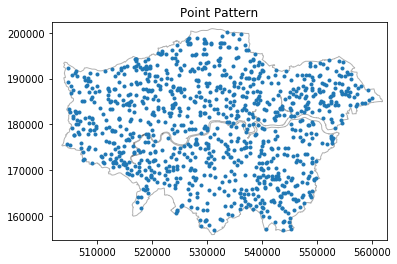

In [5]:
# generate 1000 points following csr process
# define its region boundary as london boundary
pp = ppp_csr(as_window(boundary), 1000, 1, asPP=True).realizations[0] 
# You may find realizations at index 0, which means first realized point pattern
# plot your point pattern out
pp.plot(window=True)

### <a id="Task 2">Task 2</a>
Download the London Pubs shapefile data from my github into your data folder, and get it ready for use. 
Hint: open point data from shapefile by calling `PointPattern` function, you need to pay attention to its array nature. This data will be used for following tasks, with coordinates for UTM zone 30U.

In [6]:
# Create the data dir if it doesn't exist
if os.path.isdir('data') is not True:
    print("Creating 'data' directory...")
    os.mkdir('data')

# Configure the download
url  = 'https://github.com/cusp-london/Spatial-Data-Analysis/blob/master/London_Pubs.zip?raw=true'
path = os.path.join("data","London_Pubs.zip")

# Download
r    = urllib.request.urlretrieve(url, path)

# Unzip it into the data folder
z    = zipfile.ZipFile(path)
m    = z.extractall("data")

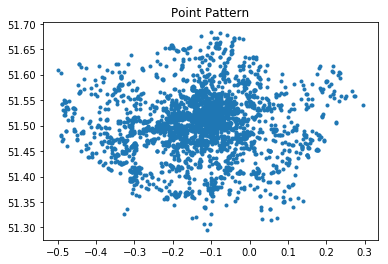

In [7]:
f = ps.open('data/London_Pubs/London_Pubs.shp')
# get the points
pp_pubs = PointPattern(np.asarray([pnt for pnt in f]))
f.close() # why we need to call f.close()?
# get the points plotted
pp_pubs.plot() 

In the following, we will use the 1000 CSR points as example to illustrate various spatial point pattern characteristics, and let you to complete corresponding tasks by using London pubs data.
### <a id="Convex Hull">Convex Hull</a>
The 1000 points following CSR process were now plotted within the London boundary, now let's try something different. Have you spotted any differences and why? What is `convex hull`?

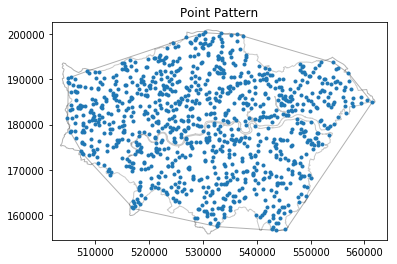

In [8]:
pp.plot(window=True, hull=True) 

`Convex hull`  is the set of all convex combinations of the points. Does it look like an envelope? That's why it is also called `convex envelope` or `convex closure` in an affine space over the points.

### <a id="Task 3">Task 3</a>
Get the convex hull for London pubs data below, and compare the output with plot above.

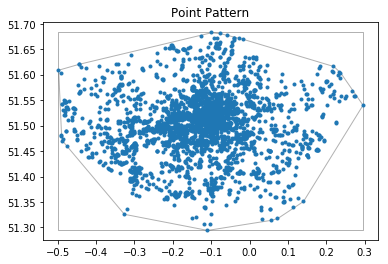

In [9]:
# your code here
pp_pubs.plot(window=True, hull=True) 

## <a id="Centrography analysis">Centrography analysis</a>

Once we were given a point data set, normally we want to first detect where the center is. Hence the center point of two-dimensional point data distribution pattern could be termed as `Central Tendency`, and could be measured by calling these four listed functions in order. 
1. `mean_center`:  the mean center of the unmarked point pattern.
2. `weighted_mean_center`:  the weighted mean center of the marked point pattern.
3. `manhattan_median`:  the manhattan median
4. `euclidean_median`:  the Euclidean median

As they have their respective pros and cons, so for your own project data in the future, the appropriate measures should be selected carefully according to your specific objective and corresponding data description. But now let's just have a general view of all of them.

In [10]:
#import four centrography analysis functions 
from pointpats.centrography import mean_center, weighted_mean_center, manhattan_median, euclidean_median

###  <a id="Mean center $(x_{mc},y_{mc})$">Mean center $(x_{mc},y_{mc})$</a> 
Calculate the mean value for $x$ and $y$ respectively.

$$x_{mc}=\frac{1}{n} \sum^n_{i=1}x_i$$
$$y_{mc}=\frac{1}{n} \sum^n_{i=1}y_i$$

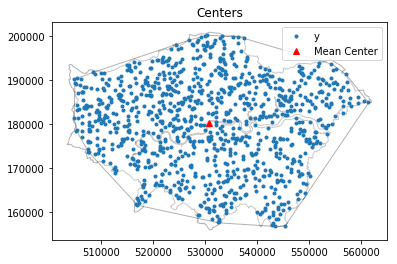

In [11]:
# find the mean centre for a series of point events, based on their (x,y) coordinates.
mc = mean_center(pp.points)
#plot point pattern "pp", convex hull, and Minimum Bounding Rectangle
pp.plot(title='Centers',  hull=True , window=True )
plt.plot(mc[0], mc[1], 'r^', label='Mean Center') # r indicates the color for marker, ^ represents icon shape
plt.legend(numpoints=1)

Can you try to get the $x,y$ information for Mean Centre?

In [12]:
# your code here
print(mc[0],mc[1])

530744.3542802609 180187.02717518774


### <a id="Weighted mean center $(x_{wmc},y_{wmc})$">Weighted mean center $(x_{wmc},y_{wmc})$</a> 

Weighted mean center is for marked point patterns, with specification for the weight for each event point.

$$x_{wmc}=\sum^n_{i=1} \frac{w_i x_i}{\sum^n_{i=1}w_i}$$
$$y_{wmc}=\sum^n_{i=1} \frac{w_i y_i}{\sum^n_{i=1}w_i}$$

In [13]:
# define the weights
weights = np.arange(1000)
wmc = weighted_mean_center(pp.points, weights)

Can you try to get the $x,y$ information for Weighted Mean Centre?

In [14]:
# your code here
print(wmc[0],wmc[1])

530628.873531502 180185.1931383651


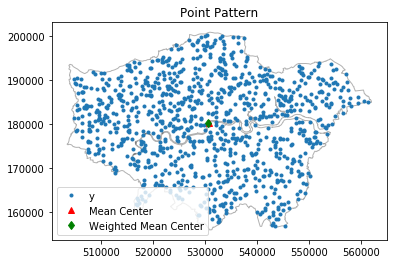

In [15]:
pp.plot(window=True) #use method "plot" to visualize point pattern
plt.plot(mc[0], mc[1], 'r^', label='Mean Center') 
plt.plot(wmc[0], wmc[1], 'gd', label='Weighted Mean Center')
plt.legend(numpoints=1)

### <a id="Manhattan Median $(x_{mm},y_{mm})$">Manhattan Median $(x_{mm},y_{mm})$</a> 

We are familiar with Median in one-dimensional space as the middle number separating the dataset by half. However in two-dimensional space, Manhattan median is defined as a tuple whose first element is the median of $x$ coordinates, and second element is the median of $y$ coordinates, which finds the location minimized the absolute distance to all the event points.  

If you can recall your exercise on `Numpy` last semester, `PySAL` handle the Manhattan median the same way as numpy.median: return the average of the two middle values.

$$min  f(x_{mm},y_{mm})= \sum^n_{i=1}(|x_i-x_{mm}|+|y_i-y_{mm}|)$$

For your understanding of the median_centre calculation, we may try to interpret its function by calling `numpy`.

In [16]:
def median_center(points, crit=0.0001):
    points = np.asarray(points)
    x0, y0 = points.mean(axis=0)
    dx = np.inf
    dy = np.inf
    iteration = 0
    while np.abs(dx) > crit or np.abs(dy) > crit:
        xd = points[:, 0] - x0
        yd = points[:, 1] - y0
        d = np.sqrt(xd*xd + yd*yd)
        w = 1./d
        w = w / w.sum()
        x1 = w * points[:, 0]
        x1 = x1.sum()
        y1 = w * points[:, 1]
        y1 = y1.sum()
        dx = x1 - x0
        dy = y1 - y0
        iteration +=1 
        print(x0, x1, dx, dy, d.sum(), iteration)
        x0 = x1
        y0 = y1
               
    return x1, y1

median_center(pp.points, crit=.0001)

530744.3542802609 530568.8304627466 -175.5238175143022 139.39621982711833 15270724.908554541 1
530568.8304627466 530470.4336841996 -98.3967785469722 67.98540709051304 15267272.056457562 2
530470.4336841996 530415.7309707096 -54.70271348999813 32.80371165362885 15266292.831460856 3
530415.7309707096 530385.461992922 -30.26897778757848 15.858266593742883 15266014.039195687 4
530385.461992922 530368.7618788739 -16.700114048086107 7.710681296943221 15265933.884969894 5
530368.7618788739 530359.5667473597 -9.19513151422143 3.776481650653295 15265910.62382634 6
530359.5667473597 530354.5116199267 -5.055127433035523 1.864414240582846 15265903.822424803 7
530354.5116199267 530351.7358462868 -2.775773639907129 0.9281122370448429 15265901.822458984 8
530351.7358462868 530350.2131425145 -1.522703772294335 0.46591107637505047 15265901.231934633 9
530350.2131425145 530349.3784939852 -0.8346485293004662 0.23583700216840953 15265901.057056835 10
530349.3784939852 530348.9212901933 -0.4572037918260321

(530348.3687869688, 180458.301847163)

You may already have read the $x,y$ information for Manhattan median centre for this output. Is it largely different from the mean center and weighted mean center coordinates?

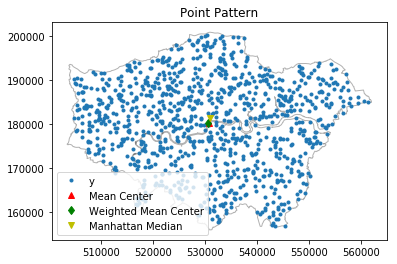

In [17]:
#Manhattan Median calculation
mm = manhattan_median(pp.points)
# plot
pp.plot(window=True)
plt.plot(mc[0], mc[1], 'r^', label='Mean Center')
plt.plot(wmc[0], wmc[1], 'gd', label='Weighted Mean Center')
plt.plot(mm[0], mm[1], 'yv', label='Manhattan Median') # "y" means yellow, "v" defines the icon's shape
plt.legend(numpoints=1)

### <a id="Euclidean Median $(x_{em},y_{em})$">Euclidean Median $(x_{em},y_{em})$</a> 

Euclidean Median is the location with minimum sum of the Euclidean distances to all points. It has been widely applied in location allocation/selection problems in the real world, and is an optimization solution in nature. In this practical, we will use first iterative algorithm (Kuhn and Kuenne, 1962) to approximate Euclidean Median.

$$min  f(x_{em},y_{em})= \sum^n_{i=1} \sqrt{(x_i-x_{em})^2+(y_i-y_{em})^2}$$

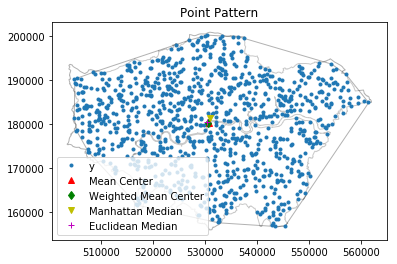

In [18]:
# Euclidean Median calculation
em = euclidean_median(pp.points)
pp.plot(window=True, hull=True)
plt.plot(mc[0], mc[1], 'r^', label='Mean Center')
plt.plot(wmc[0], wmc[1], 'gd', label='Weighted Mean Center')
plt.plot(mm[0], mm[1], 'yv', label='Manhattan Median')
plt.plot(em[0], em[1], 'm+', label='Euclidean Median')
plt.legend(numpoints=1)

### <a id="Task 4">Task 4</a>
Use the London Pubs data to calculate its **mean center**, **weighted mean center**, **Manhattann median**, **Euclidean median** respectively, get the results plotted out in one figure; list their $(x,y)$ coordinates information as well.

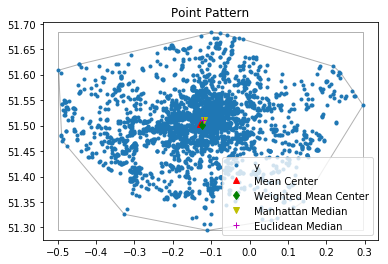

In [19]:
# your code here for plot
mc_pubs = mean_center(pp_pubs.points)
weights_pubs = np.arange(3337)
wmc_pubs = weighted_mean_center(pp_pubs.points, weights_pubs)
mm_pubs = manhattan_median(pp_pubs.points)
em_pubs = euclidean_median(pp_pubs.points)
pp_pubs.plot(window=True, hull=True)
plt.plot(mc_pubs[0], mc_pubs[1], 'r^', label='Mean Center')
plt.plot(wmc_pubs[0], wmc_pubs[1], 'gd', label='Weighted Mean Center')
plt.plot(mm_pubs[0], mm_pubs[1], 'yv', label='Manhattan Median')
plt.plot(em_pubs[0], em_pubs[1], 'm+', label='Euclidean Median')
plt.legend(numpoints=1)

In [20]:
# your code here for point coordinates
print("Mean Centre for London pubs is: " + "(" + str(mc_pubs[0]) +" , " + str(mc_pubs[1])+ ")")
print("Weighted Mean Center for London pubs is: " + "(" + str(wmc_pubs[0]) +" , " + str(wmc_pubs[1])+ ")")
print("Manhattan Median for London pubs is: " + "(" + str(mm_pubs[0]) +" , " + str(mm_pubs[1])+ ")")
print("Euclidean Median for London pubs is: " + "(" + str(em_pubs[0]) +" , " + str(em_pubs[1])+ ")")

Mean Centre for London pubs is: (-0.12791602888822276 , 51.50220853158518)
Weighted Mean Center for London pubs is: (-0.12373686153765025 , 51.501946471215035)
Manhattan Median for London pubs is: (-0.1199412 , 51.5102956)
Euclidean Median for London pubs is: (-0.12218242637795255 , 51.510311013696615)


## <a id="Dispersion and Orientation">Dispersion and Orientation</a>

### <a id="Standard Distance & Standard Distance Circle">Standard Distance & Standard Distance Circle</a>

Standard distance is closely related to standard deviation of a dataset, and measures the dispersion of the events from their mean center $(x_m,y_m)$; hence a summary circle (standard distance circle) for the point pattern could be plotted based on the measurements, centered at $(x_m,y_m)$ with radius $SD$.

$$SD = \displaystyle \sqrt{\frac{\sum^n_{i=1}(x_i-x_{m})^2}{n} + \frac{\sum^n_{i=1}(y_i-y_{m})^2}{n}}$$

We will call the `std_distance` function to calculate the standard distance.

In [21]:
from pointpats.centrography import std_distance,ellipse

In [22]:
stdd = std_distance(pp.points)
stdd

16451.329681288964

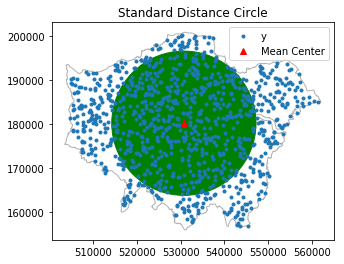

In [23]:
circle1=plt.Circle((mc[0], mc[1]),stdd,color='g')
ax = pp.plot(get_ax=True, title='Standard Distance Circle', window=True)
ax.add_artist(circle1)
plt.plot(mc[0], mc[1], 'r^', label='Mean Center')
ax.set_aspect('equal')
plt.legend(numpoints=1)

### <a id="Task 5">Task 5</a>
Calculate the standard distance for London pubs and get the result plotted in yellow:

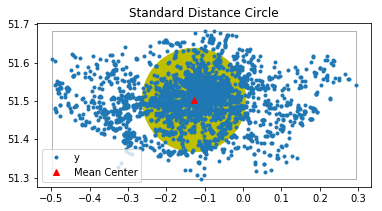

In [24]:
# your code here
stdd_pubs = std_distance(pp_pubs.points)
circle2=plt.Circle((mc_pubs[0], mc_pubs[1]),stdd_pubs,color='y')
ax = pp_pubs.plot(get_ax=True, title='Standard Distance Circle', window=True)
ax.add_artist(circle2)
plt.plot(mc_pubs[0], mc_pubs[1], 'r^', label='Mean Center')
ax.set_aspect('equal')
plt.legend(numpoints=1)

###  <a id="Standard Deviational Ellipse">Standard Deviational Ellipse</a>

The aforementioned `standard distance circle` measures dispersion using a sole parameter $SD$; whilst standard deviational ellipse measures dispersion and trend in two dimensions: angle of rotation $\theta$, dispersion along major axis $s_x$ and dispersion along minor axis $s_y$:

* Major axis defines the direction of maximum spread in the distribution. $s_x$ is the semi-major axis (half the length of the major axis):

$$ s_x = \displaystyle \sqrt{\frac{2(\sum_{i=1}^n (x_i-\bar{x})\cos(\theta) - \sum_{i=1}^n (y_i-\bar{y})\sin(\theta))^2}{n-2}}$$

* Minor axis defines the direction of minimum spread and is orthogonal to major axis. $s_y$ is the semi-minor axis (half the length of the minor axis):

$$ s_y = \displaystyle \sqrt{\frac{2(\sum_{i=1}^n (x_i-\bar{x})\sin(\theta) - \sum_{i=1}^n (y_i-\bar{y})\cos(\theta))^2}{n-2}}$$

* The ellipse is rotated clockwise through an angle $\theta$:

$$\theta = \displaystyle \arctan{\{ (\sum_i(x_i-\bar{x})^2-\sum_i(y_i-\bar{y})^2) + \frac{[(\sum_i(x_i-\bar{x})^2-\sum_i(y_i-\bar{y})^2)^2 + 4(\sum_i(x-\bar{x})(y_i-\bar{y}))^2]^\frac{1}{2}}{2\sum_i(x-\bar{x})(y_i-\bar{y})}\}}$$



In [25]:
sx, sy, theta = ellipse(pp.points)
sx, sy, theta

(14112.640444509123, 18395.570692224042, -1.4788769899132188)

In [26]:
theta_degree = np.degrees(theta) #need degree of rotation to plot the ellipse
theta_degree # The Standard Deviational Ellipse for the point pattern is rotated clockwise.

-84.73340994103866

<Figure size 432x288 with 0 Axes>

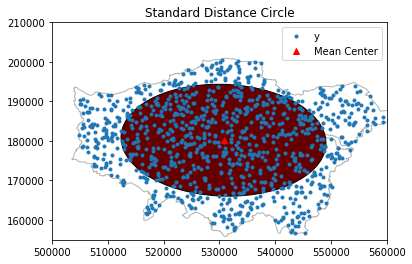

In [27]:
from matplotlib.patches import Ellipse
from pylab import figure, show,rand
fig = figure()
e = Ellipse(xy=mean_center(pp.points), width=sx*2, height=sy*2, angle=-theta_degree) #angle is rotation in degrees (anti-clockwise)
ax = pp.plot(get_ax=True, title='Standard Distance Circle', window=True)
ax.add_artist(e)
e.set_clip_box(ax.bbox)
e.set_facecolor([0.4,0,0])
e.set_edgecolor([0,0,0])
ax.set_xlim(500000,560000)
ax.set_ylim(155000,210000)
plt.plot(mc[0], mc[1], 'r^', label='Mean Center')
plt.legend(numpoints=1)
show()

### <a id="Task 6">Task 6</a>
Present your work on exploring the standard deviation of london pubs dataset. Change the color for mean center into yellow. Hint: you need to consider to change the xlim and ylim.

<Figure size 432x288 with 0 Axes>

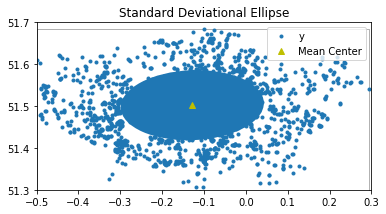

In [28]:
sx1, sy1, theta1 = ellipse(pp_pubs.points)
theta_degree1 = np.degrees(theta1) 

fig1 = figure()
e1 = Ellipse(xy=mean_center(pp_pubs.points), width=sx1*2, height=sy1*2, angle=-theta_degree1) 
ax = pp_pubs.plot(get_ax=True, title='Standard Deviational Ellipse', window=True)
ax.add_artist(e1)
e.set_clip_box(ax.bbox)
e.set_facecolor([0.8,0,0])
e.set_edgecolor([0.2,0,0])
ax.set_xlim(-0.5,0.3)
ax.set_ylim(51.3,51.7)
ax.set_aspect('equal')
plt.plot(mc_pubs[0], mc_pubs[1], 'y^', label='Mean Center')
plt.legend(numpoints=1)
show()

### <a id="Shape Analysis">Shape Analysis</a>

At the beginning of this practical, we've tried to define `hull` by caluculating the convex hull of point pattern. The full function is actually a measure for *shape analysis* of point pattern. So we are going to explore two methods: `Convex Hull (Hull)` and `Minimum Bounding Rectange (mbr)`, as follows.

1. [Convex Hull](https://en.wikipedia.org/wiki/Convex_hull) is the smallest convex set that contains a point pattern *pp*, and could get realized through calling function **hull**.

2. [Minimum Bounding Rectangle (Box)](https://en.wikipedia.org/wiki/Minimum_bounding_rectangle) is the same as the minimum bounding Rectangle of its convex hull, which is bigger than convex hull, by calling **mbr** function to calculate the vertices' values.

In [6]:
# import relevant methods
from pointpats.centrography import hull, mbr

In [7]:
# get the points defining convex hull
hull(pp.points)

array([[545327.49410223, 157060.8663642 ],
       [559964.54191253, 185789.62437454],
       [559349.52968026, 187499.55405186],
       [554809.69969453, 193585.91818311],
       [554096.59486941, 193970.34573473],
       [536105.52538625, 199700.96432349],
       [533654.14538347, 200156.35308451],
       [526725.18017415, 198874.95890861],
       [504680.93337659, 192414.56395051],
       [504537.92683099, 175595.84210212],
       [507492.46787153, 172300.94141644],
       [518027.14506598, 161636.79334933],
       [528971.37462784, 157668.86001517],
       [531287.61377306, 156931.00335503],
       [543791.84704235, 156901.39394339]])

In [8]:
# get the points defining minimum bounding rectangle
mbr(pp.points)

(504537.92683099094, 156901.39394339113, 559964.541912527, 200156.35308451302)

In [32]:
# Could you write the four vertices of the minimum bounding rectangle then?

(???, ???), (???, ???), (???, ???), (???, ???).

SyntaxError: invalid syntax (<ipython-input-32-aeb629c182fa>, line 3)

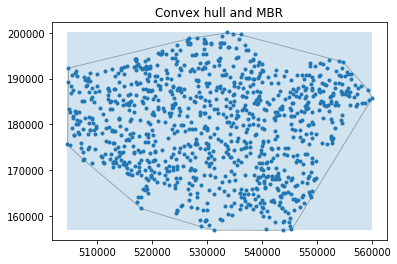

In [22]:
from matplotlib.patches import Rectangle
ax=pp.plot(get_ax=True, title ='Convex hull and MBR', hull=True)
mbr_pts=mbr(pp.points)
mbr_patch=Rectangle((mbr_pts[0], mbr_pts[1]), mbr_pts[2]-mbr_pts[0], mbr_pts[3]-mbr_pts[1], alpha=0.2)
ax.add_patch(mbr_patch)

Have you found it quite identical to what  we've got for "Centrography analysis"? Think about the reason and discuss with your neighbours. Now let's play with different combination of the "blocks".
### <a id="Task 7">Task 7</a>
Please get your code below to plot the london pubs' mean center and the standard distance circle, with convex hull presented.

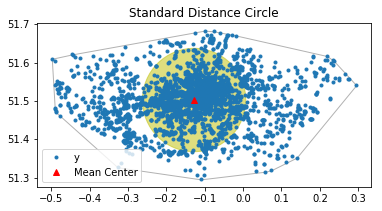

In [34]:
# Your code here
circle2=plt.Circle((mc_pubs[0], mc_pubs[1]),stdd_pubs,color='y',alpha=0.5)
ax = pp_pubs.plot(get_ax=True, title='Standard Distance Circle', hull=True)
ax.add_artist(circle2)
plt.plot(mc_pubs[0], mc_pubs[1], 'r^', label='Mean Center')
ax.set_aspect('equal')
plt.legend(numpoints=1)

## <a id="Nearest Neighbors and Statistics">Nearest Neighbors and Statistics</a>

Neighbors-based methods are known as non-generalizing machine learning methods, and there are many learning routines relying on nearest neighbors at their core. The working mechanism is that, they try to “remember” all of its training data (possibly transformed into a fast indexing structure such as a `Ball Tree` or `KD Tree`), build up the distance metrics through searching the distances between targeted point and its neighbors, and get the results of nearest neighbor point to each targeted point, as well as the corresponding distance. It can be realized through calling `NearestNeighbors` in `sklearn.neighbors`, with input data as either `NumPy` arrays or scipy.sparse matrices (the latter doesn't work for our data), and outputs as indices for the nearest neighbor to each point, together with respective distance. 

We will use the London pubs data to get nearest neighbors and the relevant distance based statistical methods.
* [Nearest Neighbors](#Nearest-Neighbors)
* [Mean Nearest Neighbor Distance Statistics](#Mean-Nearest-Neighbor-Distance-Statistics)
* [Nearest Neighbor Distance Functions](#Nearest-Neighbor-Distance-Functions)
* [Interevent Distance Functions](#Interevent-Distance-Functions)

### <a id="Nearest Neighbors">Nearest Neighbors</a>
One can use the `KDTree` or `BallTree` classes directly to find nearest neighbors. This is the functionality wrapped by the NearestNeighbors class. The Ball Tree and KD Tree have the same interface; we’ll show an example of using the `BallTree` here, and let you do the task by using `KDTree`.

In [36]:
from sklearn.neighbors import NearestNeighbors
import fiona
from shapely.geometry import shape

pp_pubs_2 = fiona.open('data/London_pubs/London_pubs.shp') # read the london pubs point shapefile data
geoms = [ shape(feat['geometry']) for feat in pp_pubs_2 ] # read the geometry
pp_pubs_arrays = [ np.array((geom.xy[0][0], geom.xy[1][0])) for geom in geoms ] # turn points into point array

In [37]:
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(pp_pubs_arrays) # use ball_tree
distances, indices = nbrs.kneighbors(pp_pubs_arrays)

In [38]:
indices 

array([[   0, 1098],
       [   1, 1163],
       [   2,    3],
       ...,
       [3334, 1054],
       [3335, 2607],
       [3336, 2733]])

In [39]:
distances

array([[0.        , 0.00085529],
       [0.        , 0.00113044],
       [0.        , 0.00187763],
       ...,
       [0.        , 0.00387549],
       [0.        , 0.00226028],
       [0.        , 0.00175393]])

Because the query set matches the training set, the nearest neighbor of each point is the point itself, at a distance of zero.
It is also possible to efficiently produce a sparse graph showing the connections between neighboring points:

In [40]:
nbrs.kneighbors_graph(pp_pubs_arrays).toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

###  <a id="Task 8">Task 8</a>
Can you get the nearest neighbors for London pubs by using KDTree? Your code below:

In [41]:
nbrs_kd = NearestNeighbors(n_neighbors=2, algorithm='kd_tree').fit(pp_pubs_arrays) # use ball_tree
distances_kd, indices_kd = nbrs_kd.kneighbors(pp_pubs_arrays)

In [42]:
indices_kd

array([[   0, 1098],
       [   1, 1163],
       [   2,    3],
       ...,
       [3334, 1054],
       [3335, 2607],
       [3336, 2733]])

In [43]:
distances_kd

array([[0.        , 0.00085529],
       [0.        , 0.00113044],
       [0.        , 0.00187763],
       ...,
       [0.        , 0.00387549],
       [0.        , 0.00226028],
       [0.        , 0.00175393]])

Are there significant differences spotted? For KDTree realization, you could also get the result through calling `KDTree` from `sklearn.neighbors`.

In [44]:
# Another KDTree function
from sklearn.neighbors import KDTree
kdt = KDTree(pp_pubs_arrays, leaf_size=30, metric='euclidean')
kdt.query(pp_pubs_arrays, k=2, return_distance=False)   

array([[   0, 1098],
       [   1, 1163],
       [   2,    3],
       ...,
       [3334, 1054],
       [3335, 2607],
       [3336, 2733]])

### <a id="Mean Nearest Neighbor Distance Statistics">Mean Nearest Neighbor Distance Statistics</a>

$$\bar{d}_{min}=\frac{1}{n} \sum_{i=1}^n d_{min}(s_i)$$

It is the average of all the points and corresponding distances demonstrated by Clark and Evans(1954), as a normal distribution under null hypothesis (CSR process). The distances between the nearest neighbor(s) $N(p)$ and the point $p$ is nearest neighbor distance for $p$, which meet the condition
$$d_{p,N(p)} \leq d_{p,j} \forall j \in S - p$$

Hence the test statistics could be used to determine whether the point pattern is CSR, cluster or regular spatial process. For example, we can call the method `knn` to find $k$ nearest neighbors for each pub point in the point pattern *pp_pubs*. The first array is the most nearest neighbor for each pub point, the second array is the distance between each pub point and its nearest neighboring pub.

In [45]:
# one nearest neighbor
pp_pubs.knn()

(array([[1098],
        [1163],
        [   3],
        ...,
        [1054],
        [2607],
        [2733]]), array([[0.00085529],
        [0.00113044],
        [0.00187763],
        ...,
        [0.00387549],
        [0.00226028],
        [0.00175393]]))

In [46]:
# two nearest neighbors
pp_pubs.knn(2)

(array([[1098, 2969],
        [1163, 3191],
        [   3, 1471],
        ...,
        [1054, 1673],
        [2607, 2608],
        [2733, 2987]]), array([[0.00085529, 0.00146997],
        [0.00113044, 0.00134921],
        [0.00187763, 0.01871476],
        ...,
        [0.00387549, 0.0041209 ],
        [0.00226028, 0.00438643],
        [0.00175393, 0.00368997]]))

In [47]:
pp_pubs.max_nnd # Maximum nearest neighbor distance

0.026317545168575214

In [48]:
pp_pubs.min_nnd # Minimum nearest neighbor distance

0.0

In [49]:
pp_pubs.mean_nnd # mean nearest neighbor distance

0.002523577526902474

In [50]:
pp_pubs.nnd # Nearest neighbor distances

array([[0.00085529],
       [0.00113044],
       [0.00187763],
       ...,
       [0.00387549],
       [0.00226028],
       [0.00175393]])

### <a id="Task 9">Task 9</a>
Can you try to think of another way to calculate the mean nearest neighbor distance?
**Hint**: recap on the definition of Mean, it should be the Sum divided by the total counts.

In [51]:
# your code here
pp_pubs.nnd.sum()/pp_pubs.n 

0.002523577526902474

###  <a id="Nearest Neighbor Distance Functions">Nearest Neighbor Distance Functions</a>

Nearest neighbour distance distribution functions of a point process are cumulative distribution functions of several kinds -- $G, F, J$. By comparing the distance function of the observed point pattern with that of the point pattern from a CSR process, we are able to infer whether the underlying spatial process of the observed point pattern is CSR or not for a given confidence level.

In [52]:
import scipy.spatial
from pointpats.distance_statistics import G, F, J, K, L, Genv, Fenv, Jenv, Kenv, Lenv

#### $G$ function - event-to-event

For a given distance $d$, $G(d)$ is the proportion of nearest neighbor distances that are less than $d$.
$$G(d) = \sum_{i=1}^n \frac{ \phi_i^d}{n}$$

$$ 
\phi_i^d =
 \begin{cases}
    1       & \quad \text{if } d_{min}(s_i)<d \\
    0       & \quad \text{otherwise } \\
  \end{cases}
$$

If the underlying point process is a CSR process, $G$ function has an expectation of:
$$
G(d) = 1-e(-\lambda \pi d^2)
$$
If the $G$ function plot is above the expectation then it is a clustering distribution, whilst dispersive distribution with a curve below the expected plot.

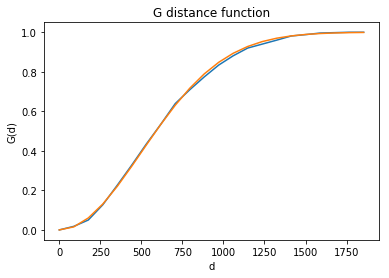

In [54]:
gp = G(pp, intervals=20)
gp.plot() # plot empirical function 

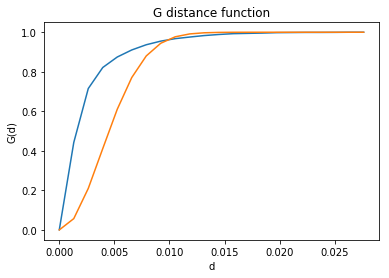

In [53]:
gp1 = G(pp_pubs, intervals=20)
gp1.plot() # plot empirical function 

The orange curve is the function's expection, and the blue curve above is the real value, which indicating a clustering point pattern with its above position.

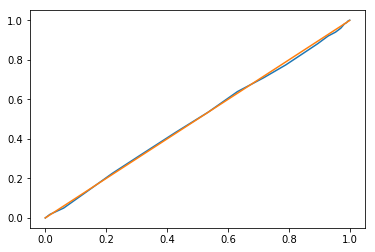

In [56]:
gp.plot(qq=True)

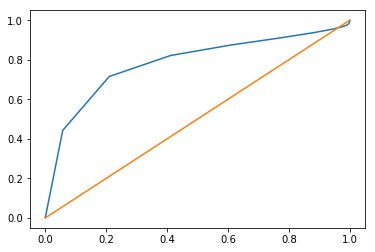

In [55]:
gp1.plot(qq=True) # quantile-quantile plot

In the q-q plot the CSR function is represented with a diagonal line. So obviously the $G$ increases very slowly at small distances and the line is above the expected value for a CSR process. We might think that the underlying spatial process is clustering. However, this visual inspection is not enough for a final conclusion.  In [Simulation Envelopes](#Simulation-Envelopes), we are going to demonstrate how to simulate data under CSR many times and construct the $95\%$ simulation envelope for $G$.

In [57]:
gp1.d # distance domain sequence (corresponding to the x-axis)

array([0.        , 0.00131588, 0.00263175, 0.00394763, 0.00526351,
       0.00657939, 0.00789526, 0.00921114, 0.01052702, 0.0118429 ,
       0.01315877, 0.01447465, 0.01579053, 0.0171064 , 0.01842228,
       0.01973816, 0.02105404, 0.02236991, 0.02368579, 0.02500167,
       0.02631755, 0.02763342])

In [58]:
gp1.G #cumulative nearest neighbor distance distribution over d (corresponding to the y-axis))

array([5.99340725e-04, 4.42613126e-01, 7.15313156e-01, 8.21696134e-01,
       8.74737788e-01, 9.10398562e-01, 9.36769553e-01, 9.55049446e-01,
       9.67635601e-01, 9.75726701e-01, 9.83218460e-01, 9.88612526e-01,
       9.92807911e-01, 9.94306263e-01, 9.95804615e-01, 9.97902307e-01,
       9.98501648e-01, 9.99100989e-01, 9.99100989e-01, 9.99400659e-01,
       1.00000000e+00, 1.00000000e+00])

#### $F$ function - "point-event" 

When the number of events in a point pattern is small, $G$ function is rough (see the $G$ function plot for the 12 size point pattern above). One way to get around this is to turn to $F$ funtion where a given number of randomly distributed points are generated in the domain and the nearest event neighbor distance is calculated for each point. The cumulative distribution of all nearest event neighbor distances is called $F$ function.

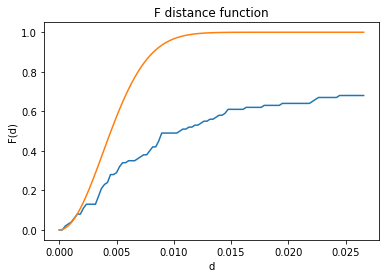

In [60]:
fp1 = F(pp_pubs, intervals=100) # The default is to randomly generate 100 points.
fp1.plot()

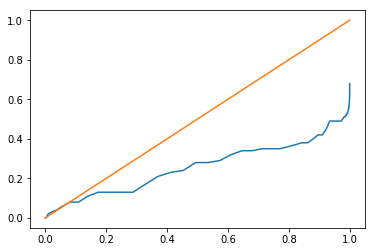

In [61]:
fp1.plot(qq=True)

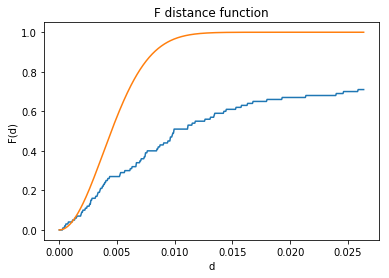

In [62]:
fp1 = F(pp_pubs, intervals=500) #We can increase the number of intervals to make F more smooth.
fp1.plot()

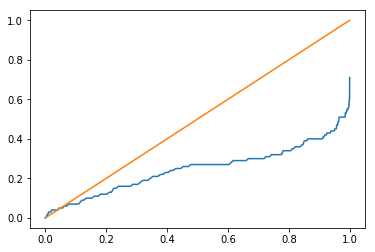

In [63]:
fp1.plot(qq=True)

**Question** Which function is comparatively smoother so far?
$F$ function is more smooth than $G$ function. 

#### $J$ function - a combination of "event-event" and "point-event"

$J$ function is defined as follows:

$$J(d) = \frac{1-G(d)}{1-F(d)}$$

If $J(d)<1$, the underlying point process is a cluster point process; if $J(d)=1$, the underlying point process is a random point process; otherwise, it is a regular point process.

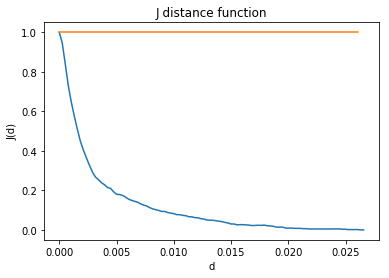

In [64]:
jp1 = J(pp_pubs, intervals=100)
jp1.plot()

From the above figure, we can observe that $J$ function is obviously below the $J(d)=1$ horizontal line. It is approaching finity with nearest neighbor distance increasing. We might tend to conclude that the underlying point process is a CSR one.

### <a id="Interevent Distance Functions">Interevent Distance Functions</a>

Nearest neighbor distance functions consider only the nearest neighbor distances, "event-event", "point-event" or the combination. Thus, distances to higer order neighbors are ignored, which might reveal important information regarding the point process. Interevent distance functions $K$ function, is proposed to consider distances between all pairs of event points. Similar to $G$, $F$ and $J$ functions, $K$ function is also cumulative distribution function.

#### $K$ function - "interevent"

Given distance $d$, $K(d)$ is defined as:
$$K(d) = \frac{\sum_{i=1}^n \sum_{j=1}^n \psi_{ij}(d)}{n \hat{\lambda}}$$

where
$$ 
\psi_{ij}(d) =
 \begin{cases}
    1       & \quad \text{if } d_{ij}<d \\
    0       & \quad \text{otherwise } \\
  \end{cases}
$$

$\sum_{j=1}^n \psi_{ij}(d)$ is the number of events within a circle of radius $d$ centered on event $s_i$ .

Still, we use CSR as the benchmark (null hypothesis) and see how the $K$ funtion estimated from the observed point pattern deviate from that under CSR, which is $K(d)=\pi d^2$. $K(d)<\pi d^2$ indicates that the underlying point process is a regular point process. $K(d)>\pi d^2$ indicates that the underlying point process is a cluster point process. 

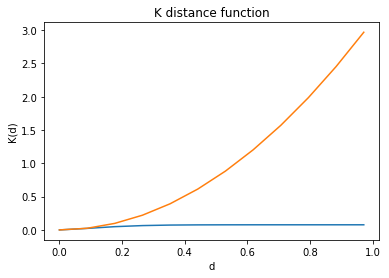

In [59]:
kp1 = K(pp_pubs)
kp1.plot()

It is obvious that, as distance increases, the K function increases dramatically, indicating a more deviation from CSR process. 

From above, we may conclude that the principle behind nearest neighbor methods is distance based (most commonly use Euclidean distance), to find a specified **number** of "training" samples closest to the target point (which is "unseen" in real case), and try to predict the label for the target from samples. So the **number** here could be a constant defined by us (for example, K nearest neighbors), or varied number based on local points density (for example, radius-based neighbors). So in the following section, we will get an idea on K Nearest Neighbors statistics, but leave the plot visualization part to next week.

## <a id="K Nearest Neighbors (KNN)">K Nearest Neighbors (KNN)</a>

**KNN** is a non parametric and instance-based algorithm, and is normally used in a supervised learning setting for classification purpose. With a dataset of training observations $(x,y)$, where x denotes the feature and y denotes the target, we want to capture the relationship between x and y for prediction purpose.

This algorithm is similarly defined according to a distance metric between two data points, which we are familiar with, and choosing the popular Euclidean distance by


$$d(x,x') = \sum^n_{i=1} \sqrt{(x_1-x'_1)^2+(x_2-x'_2)^2+......+(x_n-x'_n)^2}$$


The K-nearest neighbor algorithm  was mostly used for classification, given a positive integer $K$, to search for the major vote between the $K$ most similar instances to a given “unseen” observation $x$. It firstly runs through the whole dataset computing a similarity metric $d$ between $x$ and each training observation (the samples); a set consisting of $K$ closest points to $x$ will be get; then it estimates the conditional probability for each class, which is the proportion of points in the generated set with corresponding class label; at last, the observation $x$ gets assigned to the class with largest probability.

### <a id="Weights">Weights</a>

PySAL weights can be constructed easily from many ways, i.e. array, shapefile and dataframe. For this practical, we are going to construct the weights directly from pandas and geopandas using the .from_shapefile and .from_dataframe method. Although we will still use points data for this practical, but it is better to know that if it is polygon data, then centroid points will be used by default.

#### <a id="k-nearest neighbor weights">k-nearest neighbor weights</a>

The neighbors for a given observations can be defined using a k-nearest neighbor criterion, to create nearest neighbor weights matrix based on k nearest neighbors' distances. Based on our dataset, we can either build a knn weights directly from the london pubs shapefile, or implement it through dataframe. Please refer to http://pysal.readthedocs.io/en/latest/users/tutorials/weights.html#k-nearest-neighbor-weights for further information. Let's take $k=8$ as an example:

In [65]:
wknn_shp = ps.weights.KNN.from_shapefile(('data/london_pubs/london_pubs.shp'), k=8)
wknn_shp.neighbors[0]

[1098, 2969, 2501, 917, 923, 1253, 1235, 2647]

In [66]:
wdf = gpd.read_file('data/london_pubs/london_pubs.shp')
wknn_df = ps.weights.KNN.from_dataframe(wdf, k=8)
wknn_df.neighbors[0]

[1098, 2969, 2501, 917, 923, 1253, 1235, 2647]

You will get the identical series of 8 nearest neighbours from both functions.

#### <a id="Distance band weights">Distance band weights</a>

Knn weights ensure that all observations have the same number of neighbors. The distance bands weights define the neighbor set for each spatial unit as those other units falling within a threshold distance of the focal unit, so the number of neighbours is very likely to vary across observations with distance band weights. They can be generated for shapefiles and arrays of points with the starting point at determining the minimum nearest neighbour distance.

In [67]:
thresh = ps.min_threshold_dist_from_shapefile('data/london_pubs/london_pubs.shp')
print (thresh)

0.026317545168575214


with this threshold in hand, the distance band weights are obtained as:

In [69]:
wband = ps.weights.DistanceBand.from_shapefile('data/london_pubs/london_pubs.shp', threshold=thresh, binary=True)
wband.min_neighbors

1

Could you please explain the output here?

In [70]:
wband.histogram

[(1, 12),
 (2, 5),
 (3, 18),
 (4, 19),
 (5, 24),
 (6, 27),
 (7, 28),
 (8, 22),
 (9, 29),
 (10, 36),
 (11, 44),
 (12, 37),
 (13, 43),
 (14, 34),
 (15, 27),
 (16, 22),
 (17, 38),
 (18, 46),
 (19, 27),
 (20, 37),
 (21, 24),
 (22, 27),
 (23, 33),
 (24, 37),
 (25, 45),
 (26, 28),
 (27, 27),
 (28, 23),
 (29, 22),
 (30, 27),
 (31, 21),
 (32, 17),
 (33, 15),
 (34, 14),
 (35, 18),
 (36, 10),
 (37, 14),
 (38, 18),
 (39, 25),
 (40, 16),
 (41, 30),
 (42, 22),
 (43, 23),
 (44, 18),
 (45, 17),
 (46, 17),
 (47, 16),
 (48, 22),
 (49, 22),
 (50, 21),
 (51, 24),
 (52, 17),
 (53, 22),
 (54, 24),
 (55, 21),
 (56, 19),
 (57, 23),
 (58, 17),
 (59, 15),
 (60, 18),
 (61, 20),
 (62, 8),
 (63, 15),
 (64, 11),
 (65, 7),
 (66, 6),
 (67, 9),
 (68, 10),
 (69, 14),
 (70, 11),
 (71, 11),
 (72, 11),
 (73, 12),
 (74, 14),
 (75, 21),
 (76, 12),
 (77, 12),
 (78, 13),
 (79, 10),
 (80, 9),
 (81, 19),
 (82, 12),
 (83, 10),
 (84, 12),
 (85, 6),
 (86, 8),
 (87, 12),
 (88, 5),
 (89, 11),
 (90, 5),
 (91, 11),
 (92, 12),
 (93, 1

In [71]:
set(wband.neighbors[0]) == set([1,2])

False

In [ ]:
set(wband.neighbors[1]) == set([3,0])

False

In [ ]:
wband = ps.weights.DistanceBand.from_dataframe(wdf, threshold=thresh, binary=True)
wband.max_neighbors

543

#### <a id="Kernel weights">Kernel weights</a>

This is a combination of distance-based thresholds together with continuously valued weights supported through kernel weights. The bandwidth attribute plays the role of the distance threshold with kernel weights, while the form of the kernel function determines the distance decay in the derived continuous weights (e.g.,‘triangular’,’uniform’,’quadratic’,’epanechnikov’,’quartic’,’bisquare’,’gaussian’). All kernel methods also support construction from shapefiles with Kernel.from_shapefile, and from dataframes with Kernel.from_dataframe.

In the following example, we will use the default bandwidth setting as fixed across the observations.However you may set it into adaptive bandwidth by turning off the default 'fixed' upon your requirements.
More details on kernel weights can be found in Kernel (http://pysal.readthedocs.io/en/latest/library/weights/Distance.html#pysal.weights.Distance.Kernel).

In [ ]:
kw = ps.weights.Kernel.from_dataframe(wdf, fixed = True, function = 'gaussian')

In [ ]:
kw.weights[0]

In [ ]:
kw.bandwidth

### <a id="Task 10">Task 10</a>

Summarize the aforementioned 3 .from_dataframe methods below, and compare their outputs using the LDN-LSOAs dataset. 

In [ ]:
import geopandas as gpd
lsoadf = gpd.read_file('data/LDN-LSOAs.shp')
wknn_lsoa = ps.weights.KNN.from_dataframe(lsoadf, k=10) # k value may vary
kw_lsoa = ps.weights.Kernel.from_dataframe(lsoadf)
thresh = ps.min_threshold_dist_from_shapefile('data/LDN-LSOAs.shp')
dbb_lsoa = ps.weights.DistanceBand.from_dataframe(lsoadf, threshold=thresh, binary=False)
dbc_lsoa = ps.weights.DistanceBand.from_dataframe(lsoadf, threshold=thresh, binary=True)

print(wknn_lsoa.neighbors[0])
print(kw_lsoa.neighbors[0])
print(dbb_lsoa.neighbors[0])
print(dbc_lsoa.neighbors[0])

# Credits
You've done almost 99.9%! Let's have something Fun, to get a simple heatmap of London Pubs for your reference.

To realize the heatmap function for today, we scheduled to use `GeoDataFrame` to get point data geometries, then to realize the visualization of heatmap by defining a heatmap function, which utilizes `Numpy`'s 2D historgram binning, smoothing from `Scipy` and `matplotlib`'s plot. 

In [ ]:
# use geopandas to read london pubs shapefile data
# your code here
ldn_pubs=gpd.read_file('data/london_pubs/london_pubs.shp')

In [ ]:
# define heatmap function

from scipy import ndimage
def heatmap(d, bins=(50,50), smoothing=2, cmap='jet'):
    def getx(pt):
        return pt.coords[0][0]     

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx)) # get the x value from geometry, replace ???
    y = list(d.geometry.apply(gety)) # get the y value from geometry, replace ???
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins) # call numpy's 2D histogram function
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest') # scipy's ndimage
    
    plt.imshow(logheatmap, cmap=cmap, extent=extent)  # plot the heatmap
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()

In [ ]:
heatmap(ldn_pubs, bins=50, smoothing=2)
# try change the value of bins and smoothing, what are the differences?

Next week, we will mainly look at density based point pattern analysis (density estimates, KDE, etc.), and Nearest Neighbors Classification realization by using London pubs data and Airbnb listings data, so please get them at hand then.

## Take home task (Optional):

This is handy for you to understand what is heatmap, but the map quality is still not good, do you have any idea in mind for better visualization? We may then use it for next week. 

**Hint: Interactive Map we've learned!**

Since we are going to realize KDE heatmap visualization next week, it is better to have an idea of KDE utilization in the GIS application you are familiar with. So if you are interested to have a try, it is recommended to realize the KDE Heatmap visualization for London Pubs data in ArcGIS or QGIS for visualization. Try to compare these methods and interpret what the heatmap telling us about?

For ArcGIS user: 
-  in ArcMap, then go to find the Spatial Analyst Tools -> Density -> Kernel Density and carry out KDE under ArcToolBox.

For QGIS user:
- find Heatmap Plugin, or download and install the plug-in from (http://docs.qgis.org/2.0/en/docs/user_manual/plugins/plugins_heatmap.html)
- View -> Toolbars -> Raster -> Heatmap
- set up radius, further select colormap from Layer properties.